# Importing the Dependencies

In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Data Collection and Data Processing

In [66]:
# prompt: link google colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
data_path = '/content/drive/MyDrive/Machine Learning Projects/Rock vs Mine Prediction/Data'

In [68]:
import os
os.listdir(data_path)

['sonar_data.csv']

In [69]:
sonar_data = pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Rock vs Mine Prediction/Data/sonar_data.csv', header=None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [70]:
# number of rows and columns
sonar_data.shape

(208, 61)

In [71]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [72]:
sonar_data[60].value_counts()

,count
60,
M,111
R,97


M --> Mine

R --> Rock

In [73]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [74]:
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [75]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

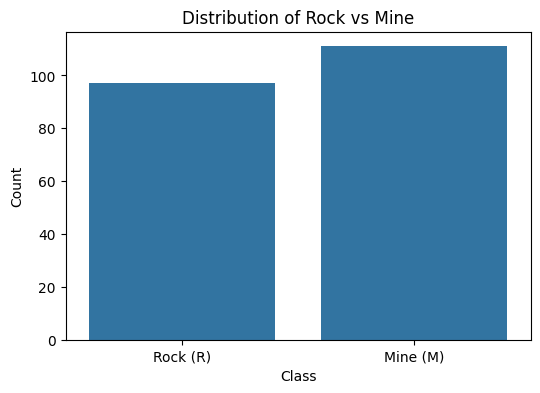

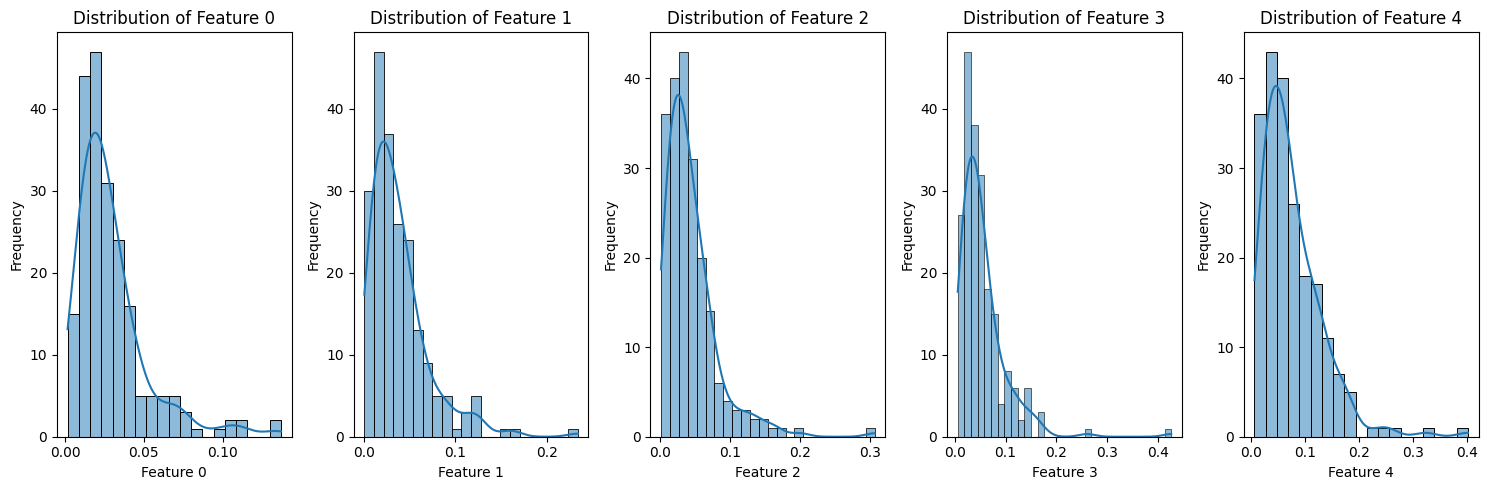

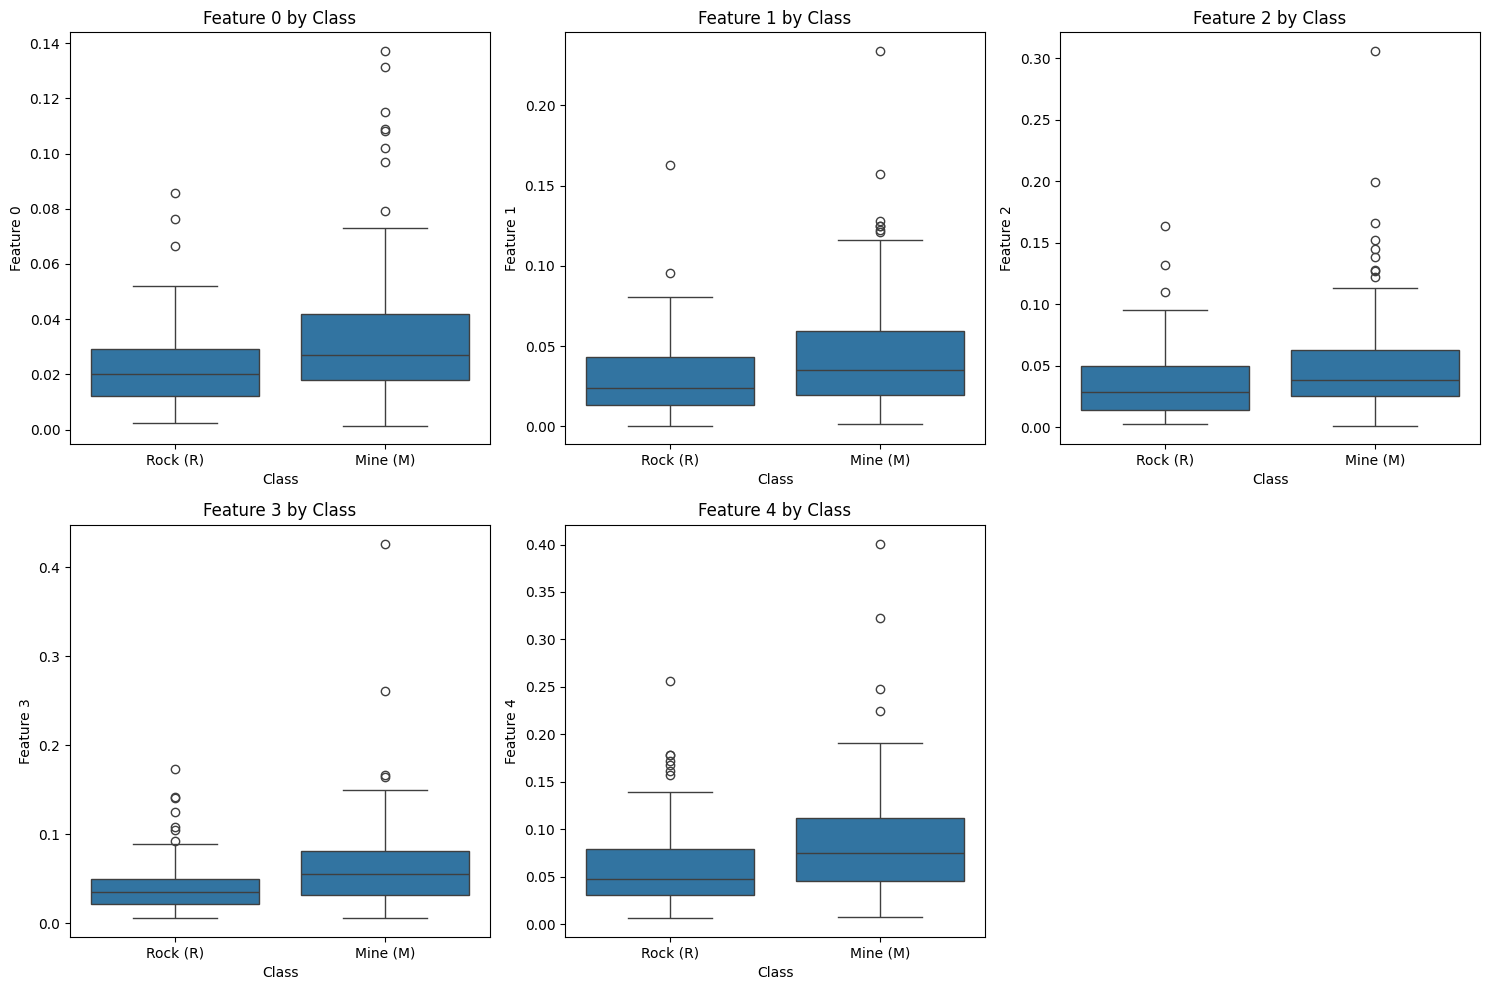

In [76]:
# prompt: can you make a visual representation of x and y here

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable Y
plt.figure(figsize=(6, 4))
sns.countplot(x=Y)
plt.title('Distribution of Rock vs Mine')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rock (R)', 'Mine (M)']) # Assuming 'R' maps to 0 and 'M' maps to 1 or vice versa based on value_counts
plt.show()

# Visualize the distribution of the features in X (e.g., using histograms or box plots for a few features)
# Let's visualize the distribution of the first few features
num_features_to_visualize = 5
plt.figure(figsize=(15, 5))
for i in range(num_features_to_visualize):
    plt.subplot(1, num_features_to_visualize, i + 1)
    sns.histplot(X.iloc[:, i], kde=True)
    plt.title(f'Distribution of Feature {i}')
    plt.xlabel(f'Feature {i}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Another way to visualize feature distributions across classes
# This might be too crowded for 60 features, so let's visualize a few features against the target
num_features_to_visualize_by_class = 5
plt.figure(figsize=(15, 10))
for i in range(num_features_to_visualize_by_class):
    plt.subplot(2, int(np.ceil(num_features_to_visualize_by_class/2)), i + 1)
    sns.boxplot(x=Y, y=X.iloc[:, i])
    plt.title(f'Feature {i} by Class')
    plt.xlabel('Class')
    plt.ylabel(f'Feature {i}')
    plt.xticks([0, 1], ['Rock (R)', 'Mine (M)'])
plt.tight_layout()
plt.show()


#Training and Test data

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


#Model Training --> Logistic Regression

In [45]:
model = LogisticRegression()

In [46]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

#Model Evaluation

In [48]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [49]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8342245989304813


In [63]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [51]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on training data :  0.7619047619047619


#Making a Predictive System

In [64]:
input_data = (0.0134,0.0172,0.0178,0.0363,0.0444,0.0744,0.0800,0.0456,0.0368,0.1250,0.2405,0.2325,0.2523,0.1472,0.0669,0.1100,0.2353,0.3282,0.4416,0.5167,0.6508,0.7793,0.7978,0.7786,0.8587,0.9321,0.9454,0.8645,0.7220,0.4850,0.1357,0.2951,0.4715,0.6036,0.8083,0.9870,0.8800,0.6411,0.4276,0.2702,0.2642,0.3342,0.4335,0.4542,0.3960,0.2525,0.1084,0.0372,0.0286,0.0099,0.0046,0.0094,0.0048,0.0047,0.0016,0.0008,0.0042,0.0024,0.0027,0.0041)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

['M']
The object is a mine
